# Homework 1
## Homework guideline
- The deadline is Sep 28th 10:30am. Submission after the deadline will not be graded. 

- Submit your work(your reasoning and your code) as a SINGLE .ipynb document. Please rename the document as _HW1_YOURNAME.ipynb_ (for example, _HW1_FELIX.ipynb_). You are responsible for checking that you have correctly submitted the correct document. If your code cannot run, you may receive NO point. 

- Please justify all short answers with a brief explanation.

- You only use the Python packages included in the following cell. You are not allowed to use other advanced package or modules unless you are permitted to. 

- In your final submission include the plots produced by the unedited code as presented below, as well as any additional plots produced after editing the code during the course of a problem. You may find it necessary to copy/paste relevant code into additional cells to accomplish this.

- Feel free to use the lecture notes and other resources but work on your own!

In [1]:
%pylab inline 
import numpy.linalg as LA

Populating the interactive namespace from numpy and matplotlib


# Q1: Low rank approximation (25pt)
In class we discussed SVD can be used to help matrix low rank approximation. Say the square matrix $X\in \mathbb{R}^{n\times n}$, the SVD for the matrix $X$ is $X = \sum_{i=1}^{n} \sigma_i u_i v_i^\top$. Let's explore this with the following image example. This is a very famous photo and many used it as the test example. 



---


### 1. load data

You don't need to do anything in this part. Feel free to comment. 

(256, 256)
256


Text(0.5, 1.0, 'Matrix $X$ encoding a Grayscale Image\n(Rank, $r=$256)')

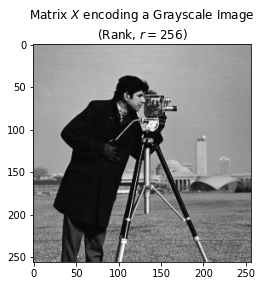

In [2]:
img = plt.imread('https://github.com/yexf308/MAT592/blob/main/homework/HW1/cameraman.png?raw=true')
# we don't want to work on tensor. Let's turn it into a matrix 
# encode RGBa image as matrix of intensities, X
R = img[::, ::, 0]
G = img[::, ::, 1]
B = img[::, ::, 2] 
X = 0.2989 * R + 0.5870 * G + 0.1140 * B
X_rank = LA.matrix_rank(X, 0.)

# here are some basic information
print(X.shape)
print(X_rank)

# Let's look at this image in grayscale. 
plt.imshow(X, cmap='gray')
plt.title(f"Matrix $X$ encoding a Grayscale Image\n(Rank, $r=${X_rank})")



---
### 2. Plot Singular Values (5pt)
Perform the singular value decomposition and plot the singular values of this matrix in descending order. Print out top 20 singular values. 
Please comment your findings. Note this is very important in image compression. 



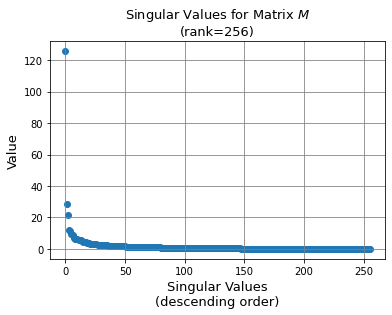

In [3]:
U,S,V=LA.svd(X)

plt.scatter(range(len(S)), S)
plt.title('Singular Values for Matrix $M$\n(rank=256)', fontsize=13)
plt.xlabel('Singular Values\n(descending order)', fontsize=13)
plt.ylabel('Value', fontsize=13)
plt.grid(c='gray')

In [4]:
print('Top 20 Singular Values:\n')
for item in list(S[:20]):
    print(item)

Top 20 Singular Values:

125.62039
28.349152
21.47399
12.18815
11.506297
9.482795
9.04048
7.1393657
6.609029
6.1967845
6.0150127
5.844142
5.631469
5.5854716
5.0064387
4.692855
4.478231
4.381007
3.9015408
3.8644621


## **Your Answer**:

Observing the top twenty singular values, we see that the error between the orginal image and the compressed image drastically reduces from rank=1 and starts to level out as rank passes around rank=15. This is suggesting that we can find a rank << full rank so the compressed image can approximate our original image accurately without using its full rank.



---


### 3. Low rank approximation (10pt)

Find low rank approximation for the matrix $X$ with the rank 4, 8, and 16, $\hat{X}_4, \hat{X}_8, \hat{X}_{16}$. You don't need to print out the matrix, instead you can use _imshow_ to show the matrix in the image form, like I did in the first part. Please comment the quality of these image and the **compression rate**(Feel free to ask me if you don't know). 

In [5]:
def LRA(rank,X):
    U,S,V=LA.svd(X)
    lra= np.matrix(U[:, :rank]) * np.diag(S[:rank]) * np.matrix(V[:rank, :])
    return lra, plt.imshow(lra, cmap='gray')

In [6]:
def compression_rate(rank,X):
  n,m=X.shape
  CR=((m*rank)+(rank)+(rank*n))/(n*m)
  return CR

0.03131103515625

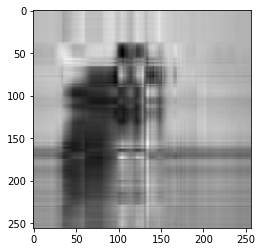

In [7]:
LRA(4,X)[1]
compression_rate(4,X)

0.0626220703125

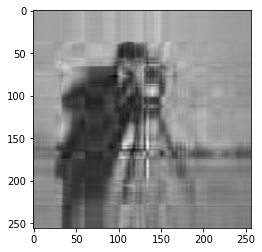

In [8]:
LRA(8,X)[1]
compression_rate(8,X)

0.125244140625

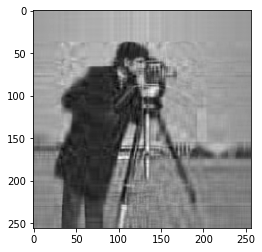

In [9]:
LRA(16,X)[1]
compression_rate(16,X)

## **Your Answer**:

When comparing the compressed images along with their compression rate for ranks 4, 8 and 16, we notice image quality increases as compression rate increases. It is noticeable from our findings that even at rank=16, image quality has improved enough where image objects and actions are recognizable (although, we still lack clarity of the background objects of the image). Rank values greater than 16 will show even clearer compressed images and as rank approaches full rank, compressed images approach the original image.



---


### 4. Residue (10pt)
Print out the 2-norm of the residue for the low rank approximation. It is defined as $\|X-\hat{X}\|_2$. Compare these 2-norm of the residue with the singular values of the matrix $X$. Please comment on your findings.  

**Optional problem**: What if I change 2-norm to frobenius norm? 

2-norm for low rank approximation is [125.62039, 28.349152, 21.47399, 12.18815, 11.506297, 9.482795, 9.04048, 7.1393657, 6.609029, 6.1967845, 6.0150127, 5.844142, 5.631469, 5.5854716, 5.0064387, 4.692855, 4.478231, 4.381007, 3.9015405, 3.8644621, 3.5738158, 3.366837, 3.1790025, 3.13471, 3.0624073, 2.97532, 2.8690276, 2.6673949, 2.6352165, 2.6255124, 2.531191, 2.4431639, 2.389044, 2.2909324, 2.2325284, 2.1739576, 2.1001515, 2.073788, 2.0329812, 1.970814, 1.9600337, 1.8876424, 1.8572702, 1.8142971, 1.7706096, 1.7070727, 1.6786909, 1.6713912, 1.6251128, 1.5851935, 1.5410148, 1.5235542, 1.465629, 1.4121101, 1.4012756, 1.36013, 1.3391123, 1.3208911, 1.2878307, 1.2640909, 1.2509189, 1.2273511, 1.1964703, 1.1687104, 1.1612861, 1.1312997, 1.1056601, 1.0978576, 1.0789449, 1.0769037, 1.0567654, 1.0476322, 1.009638, 1.0012654, 0.9871784, 0.9738294, 0.954675, 0.9353059, 0.92438006, 0.9007093, 0.89036363, 0.87833714, 0.8627242, 0.8591764, 0.8437046, 0.8293336, 0.81119007, 0.8058496, 0.7897802, 0.77

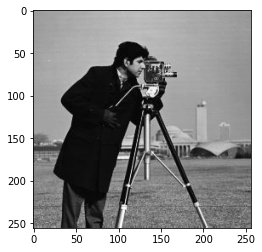

In [10]:
#2-norm of Residue
R=[]
for i in range(0,X_rank):
    R.append(LA.norm(X-LRA(i,X)[0],2))
print(f'2-norm for low rank approximation is {R}')

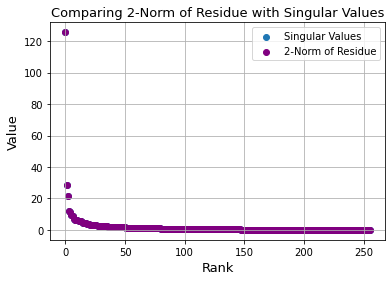

In [11]:
plt.scatter(range(0,X_rank), S, label='Singular Values')
plt.scatter(range(0,X_rank), R, label='2-Norm of Residue', c='purple')
plt.title('Comparing 2-Norm of Residue with Singular Values', fontsize='13')
plt.xlabel('Rank', fontsize=13)
plt.ylabel('Value', fontsize=13)
plt.grid()
plt.legend()

#fro norm is default for matrix norm

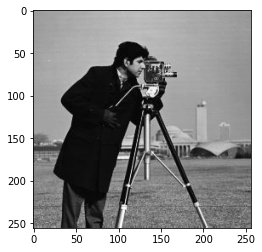

In [12]:
#Forbenius norm of Residue
F=[]
for i in range(0,X_rank):
    F.append(LA.norm(X-LRA(i,X)[0], ord='fro'))

Frobenius-norm for low rank approximation is [134.6024, 48.346405, 39.162483, 32.75008, 30.397648, 28.135777, 26.489592, 24.899162, 23.853674, 22.919828, 22.066227, 21.23059, 20.41039, 19.618118, 18.806196, 18.127565, 17.509592, 16.927235, 16.350475, 15.87816, 15.400711, 14.980311, 14.597059, 14.246688, 13.897543, 13.555934, 13.225385, 12.910442, 12.631885, 12.353953, 12.071737, 11.803385, 11.547765, 11.297935, 11.063225, 10.835625, 10.615305, 10.405481, 10.196737, 9.992019, 9.795731, 9.597635, 9.410176, 9.225073, 9.044904, 8.869906, 8.704087, 8.540675, 8.375535, 8.216361, 8.061994, 7.913344, 7.7652946, 7.6257286, 7.4938426, 7.361665, 7.2349267, 7.109918, 6.9861417, 6.8664165, 6.7490554, 6.632115, 6.517558, 6.4067945, 6.299296, 6.191328, 6.0870943, 5.985835, 5.8842955, 5.7845316, 5.6834044, 5.5842934, 5.4851437, 5.3914223, 5.2976317, 5.2048416, 5.1129284, 5.02301, 4.935163, 4.84782, 4.7634106, 4.6794586, 4.596287, 4.5145946, 4.432085, 4.351039, 4.27127, 4.193533, 4.1153765, 4.0388823, 

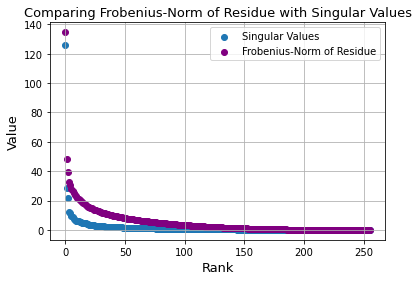

In [13]:
plt.scatter(range(0,X_rank), S, label='Singular Values')
plt.scatter(range(0,X_rank), F, label='Frobenius-Norm of Residue', c='purple')
plt.title('Comparing Frobenius-Norm of Residue with Singular Values', fontsize='13')
plt.xlabel('Rank', fontsize=13)
plt.ylabel('Value', fontsize=13)
plt.grid()
plt.legend()
print(f'Frobenius-norm for low rank approximation is {F}')

## **Your Answer**:

We notice that 2-norm values are the same as the singular values. When comparing the 2-norm with frobenius-norm, frobenius norm appears to have higher values than those of 2-norm values.



---


## Q2:Monty Hall Problem (15pt)
Imagine a game show with the following rules: There are three doors, labelled 1, 2, 3. A single prize (e.g., a car) has been hidden behind one of them. You get to select one door. Then the gameshow host opens one of the other two doors (not the one you picked), in such a way as to not reveal the prize location. At this point, you will be given a fresh choice of door: you can either stick with your first choice, or you can switch to the other closed door. All the doors will then be opened and you
will receive whatever is behind your final choice of door.

For example, suppose you choose door 3, and the gameshow host opens door 1, revealing nothing behind the door, as promised. Should you (a) stick with door 3, or (b) switch to door 2, or (c) does it make no difference?

Please justify your answer in **your own language**.

## **Your Answer**: 

#(b) Switch to Door 2

Following the example above, you should (b) switch to Door 2. Under the assumption that Door 3 is chosen, the probability the prize is behind Door 3 is P(3) = $\frac{1}{3}$. Therefore the probability the prize is not behind Door 3 is equivalent to the probability the prize is behind Door 1 or Door 2: P(1 or 2) = 1 - P(3) = $\frac{2}{3}$.

Since our initial assumption holds, offering you to reconsider your choice, after revealing Door 1, gives an incentive for choosing Door 2. Knowing the prize is not behind Door 1 does not change the fact P(1 or 2) = $\frac{2}{3}$. Moreover, now that Door 1 is revealed, P(2) = P(1 or 2) = $\frac{2}{3}$. Therefore, switching doors doubles your chances of choosing the correct door: Door 2.



---


# Q3:Prostate Cancer (35pt)
**Background**: The data for this example come from a study by Stamey et al. (1989) that examined the correlation between the level of prostate specific antigen (PSA) and a number of clinical measures, in 97 men who were about to receive a radical prostatectomy.
The goal is to predict the log of PSA (lpsa) from a number of measurements.

Variables:

|         |                                                       |
|---------|-------------------------------------------------------|
|lpsa     |log prostate specific antigen                          |
|lcavol   |log cancer volume                                      |
|lweight  |log prostate weight                                    |
|age      |age                                                    |
|lbph     |log of benign prostatic hyperplasia amount             |
|svi      |seminal vesicle invasion                               |
|lcp      |log of capsular penetration                            |
|gleason  |Gleason score                                          |
|pgg45    |percent of Gleason scores 4 or 5                       |



---


### 1.Load and Prepare Data (5pt)

The following code loads the the prostate cancer data set. You can see there are 8 features and 97 cases. Please divide the dataset into two parts: the first 67 cases as training set and the next 30 cases as test set. 

In [17]:
from scipy.io import loadmat

!wget https://github.com/yexf308/MAT592/blob/main/homework/HW1/prostateStnd.mat?raw=true -O prostateStnd.mat
data = loadmat('prostateStnd.mat')
names = list(map(lambda x: x[0], data['names'][0]))
Xtrain, ytrain = data['Xtrain'], data['ytrain']
Xtest, ytest   = data['Xtest'], data['ytest']
print(names)
print(Xtrain.shape)
print(Xtest.shape)

--2021-12-14 00:24:53--  https://github.com/yexf308/MAT592/blob/main/homework/HW1/prostateStnd.mat?raw=true
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/yexf308/MAT592/raw/main/homework/HW1/prostateStnd.mat [following]
--2021-12-14 00:24:53--  https://github.com/yexf308/MAT592/raw/main/homework/HW1/prostateStnd.mat
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/yexf308/MAT592/main/homework/HW1/prostateStnd.mat [following]
--2021-12-14 00:24:53--  https://raw.githubusercontent.com/yexf308/MAT592/main/homework/HW1/prostateStnd.mat
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... con



---



### 2. Coefficient of Determination (5pt)
Please write a function to calculate **Coefficient of Determination**
$$ R^2= 1- \frac{\sum_{n=1}^N(\hat{y}_n-y_n)^2}{\sum_{n=1}^N(\bar{y}-y_n)^2}$$

In [18]:
def r2_score(ytrue, ypred):
  """
  coefficient of determination R^2 = 1 - (SSE/SST)
  """
  ybar=mean(ytrue)
  r_squared = 1-(sum((ypred-ytrue)**2)/sum((ybar-ytrue)**2))
  return r_squared

In [19]:
def RSS(y_residue):
  return 1/2 * np.sum(y_residue**2)



---


### 3. Least Square (5pt)

Please perform the linear regression with least squares. Use the function defined above to calculate coefficient of determination.
Use this model to calculate the RSS(residual sum of squares) on the test set. Do you think we have the overfitting issue?

In [20]:
class color:
  BOLD = '\033[1m'

In [21]:
#TRAINING DATA
n2,m2=Xtrain.shape
X_ones2=np.ones((n2,1))
X2=np.column_stack((X_ones2,Xtrain))

q2,r2 = LA.qr(X2)
w2 = LA.solve(r2, q2.T.dot(ytrain))
yhat2=X2.dot(w2)

#plot(Xtrain,ytrain,'bx');
#plot(Xtrain,yhat2,'ro');

#R^2 train
#print(f'R2 for train data is {r2_score(ytrain,yhat2)}')
#RSS train
#print(color.BOLD + f'RSS for train data is {RSS(ytrain-yhat2)}' + color.BOLD)

In [22]:
#TESTING DATA
n1,m1=Xtest.shape
X_ones1=np.ones((n1,1))
X1=np.column_stack((X_ones1,Xtest))

yhat1=X1.dot(w2) #predicted y
#plot(Xtest,ytest,'bx');
#plot(Xtest,yhat1,'ro');

#R^2 test
print(f'R2 for Least Square is {r2_score(ytest,yhat1)}')
#RSS test
print(color.BOLD + f'RSS for Least Square is {RSS(ytest-yhat1)}' + color.BOLD)

R2 for Least Square is 0.4414014941560529
RSS for Least Square is 8.794937561982351


## **Your Answer**:

We have an overfitting issue when using our test data. Our RSS value is $\bf8.794937561982351$ which suggests our overfit.



---


### 4. Ridge Regression (10pt)

Please perform the Ridge regression. Use the RSS on the test data to find the optimal penalty parameter $\lambda$. Also calculate coefficient of determination. Compare with the least square, do you have any improvement? 

In [23]:
#Lambda equal to zero is equivalent to least squares. Test to make sure your ridge code is working.

l=0; #change number to notice different affects to RSS
sq_Lambda=diag(ones(9)*sqrt(l))

X1_tilde=np.vstack([X2, sq_Lambda])
ytrain_tilde=append(ytrain,zeros(9))

H_tilde=dot(X1_tilde,LA.pinv(X1_tilde))
yhat1_tilde=dot(H_tilde,ytrain_tilde)

#plot(Xtest,ytest,'bx');
#plot(Xtest,yhat1_tilde[0:ytest.size],'ro');

q,r=LA.qr(X1_tilde)
w1_tilde=LA.solve(r, q.T.dot(ytrain_tilde))

w1_hat = np.array([w1_tilde])
yhat1_test=X1.dot(w1_hat.T)

print(f'R2 for lambda={l} is {r2_score(ytest,yhat1_test)}')
print(color.BOLD + f'RSS for lambda={l} is {RSS(ytest-yhat1_test)}' + color.BOLD)

R2 for lambda=0 is 0.4414014941560528
RSS for lambda=0 is 8.794937561982353


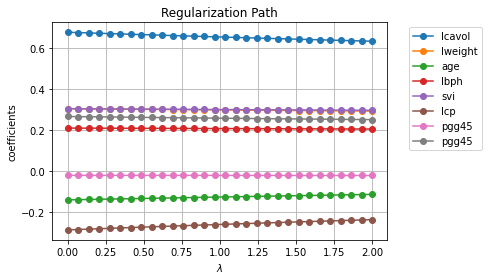

In [24]:
l_span   = linspace(0,2,30)
w1_store = zeros((30, 9))
error_store = zeros(30)

for index in range(len(l_span)):
  l         = l_span[index]
  sq_Lambda = diag(ones(9)*sqrt(l)) 
  X1_tilde  = np.vstack([X2, sq_Lambda])
  ytrain_tilde   = append(ytrain, zeros(9))
  q, r       = linalg.qr(X1_tilde);
  w1_tilde    = linalg.solve(r, q.T.dot(ytrain_tilde))
  w1_store[index,:] = w1_tilde
  w1_hat=np.array([w1_tilde])
  yhat1_test = X1.dot(w1_hat.T) 
  error_store[index] = RSS(ytest-yhat1_test)

fig, ax = plt.subplots()
#ax.plot(l_span, w1_store[:,0],'-o',label='intercept')
ax.plot(l_span, w1_store[:,1],'-o',label= f'{names[0]}')
ax.plot(l_span, w1_store[:,2],'-o',label= f'{names[1]}')
ax.plot(l_span, w1_store[:,3],'-o',label=f'{names[2]}')
ax.plot(l_span, w1_store[:,4],'-o',label= f'{names[3]}')
ax.plot(l_span, w1_store[:,5],'-o',label= f'{names[4]}')
ax.plot(l_span, w1_store[:,6],'-o',label= f'{names[5]}')
ax.plot(l_span, w1_store[:,7],'-o',label=f'{names[7]}')
ax.plot(l_span, w1_store[:,8],'-o',label= f'{names[7]}')
leg = ax.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left');
ylabel('coefficients')
xlabel('$\lambda$')
title('Regularization Path')
grid()

min of RSS in lambda is 8.729975172371335
optimal lambda is  1.3793103448275863
[ 2.42755659  0.64488597  0.29535044 -0.12186781  0.20589451  0.29803748
 -0.25119741 -0.02161005  0.25454815]


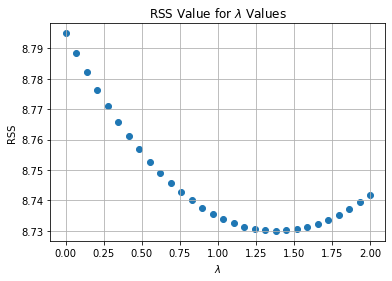

In [ ]:
fig, ax = plt.subplots()
ax.scatter(l_span, error_store)
ylabel('RSS')
xlabel('$\lambda$')
title('RSS Value for $\lambda$ Values')
grid()
print('min of RSS in lambda is', min(error_store)) 
print('optimal lambda is ', l_span[argmin(error_store)])
print(w1_store[argmin(error_store),:])

In [ ]:
l=1.3793103448275863; #optimal lambda obtained
sq_Lambda=diag(ones(9)*sqrt(l))

X1_tilde=np.vstack([X2, sq_Lambda])
ytrain_tilde=append(ytrain,zeros(9))

H_tilde=dot(X1_tilde,LA.pinv(X1_tilde))
yhat1_tilde=dot(H_tilde,ytrain_tilde)

q,r=LA.qr(X1_tilde)
w1_tilde=LA.solve(r, q.T.dot(ytrain_tilde))

w1_hat = np.array([w1_tilde])
yhat1_test=X1.dot(w1_hat.T)

print(f'R2 for Ridge with Optimal Lambda is {r2_score(ytest,yhat1_test)}')
print(color.BOLD + f'RSS for Ridge with Optimal Lambda is {RSS(ytest-yhat1_test)}' + color.BOLD)

R2 for Ridge with Optimal Lambda is 0.4455274920402933
RSS for Ridge with Optimal Lambda is 8.729975172371335


## **Your Answer**:

Using ridge regression, there is an improvement in our model with a slight change in RSS $\bf(8.729975172371335)$, but our R2 suffers a loss $\bf(0.4455274920402933)$.



---


### 5. LASSO (10pt)

Please test LASSO with different choices of $\lambda$, plot the regularization path, i.e, the coefficients vs the $\lambda$ for each feature. When $\lambda=0$, it is equivalent with the least square regression. As we increase $\lambda$, these coefficients are gradually turning off. Please use this path to perform the **feature selection**, then re-estimate the chosen coefficients using least squares (**debiasing**). 



In [30]:
def lasso(X, y, l1, tol=1e-6):

  """The Lasso Regression model
      Pathwise coordinate descent with co-variance updates is applied.

      X - NumPy matrix, size (N, d), of standardized numerical predictors, note the first column is ones.
      y - NumPy array, length N, of numerical response.
      l1 - L1 penalty tuning parameter (positive scalar)
      tol - Coordinate Descent convergence tolerance (exited if change < tol)

  """
  m, n      = np.shape(X)
  q, r      = linalg.qr(X);
  w_s       = linalg.solve(r, q.T.dot(y))
  iter   = 0
  while True:
      w_star = w_s.copy()
      for j in range(n):
       # norm_X_j = LA.norm(X[:, j])
       # selector = [i for i in range(X.shape[1]) if i != j]
       # a = X[:, j].dot(y[:, np.newaxis] - X[:, selector].dot(w_s[:, np.newaxis][selector, :]))
       # res = np.sign(a) * max(abs(a) - l1, 0)   
       # w_s[j] = res/(norm_X_j**2)

         a_j     = LA.norm(X[:, j])**2
         index   = arange(n)
         index_d = delete(index, j)
         c_j     = np.dot(X[:,j].T, y-np.dot(X[:,index_d],w_s[index_d]))
         update  = c_j/a_j
         w_s[j]  = np.sign(update) * max(abs(update) - l1/a_j, 0)
            
        
      iter += 1
      if np.all(abs(w_s - w_star) < tol):
        print('Number of iteration is ', iter)
        break

  return w_s

In [31]:
w=lasso(X1,ytest,1.3793103448275863,tol=1e-06)
print(w)

Number of iteration is  19
[[ 2.4415564 ]
 [ 0.53231627]
 [ 0.07545242]
 [-0.        ]
 [-0.05040722]
 [ 0.2207174 ]
 [ 0.25061407]
 [ 0.        ]
 [ 0.        ]]


In [32]:
wnew=[]
for i in w:
  if i[0]!=0:
    wnew.append(i[0])

In [33]:
p,q=X1.shape
Xnew=zeros((p,5))
Xnew[:,0] = X1[:,1]
Xnew[:,1] = X1[:,2]
Xnew[:,2] = X1[:,4]
Xnew[:,3] = X1[:,5]
Xnew[:,4] = X1[:,6]

In [34]:
N,M=Xnew.shape
X_1=np.ones((N,1))
Xnew1=np.column_stack((X_1,Xnew))

Q,R = LA.qr(Xnew1)
wnew = LA.solve(R, Q.T.dot(ytest))
ynewhat=Xnew1.dot(wnew)
#plot(Xnew,ytest,'bx');
#plot(Xnew,ynewhat,'ro');

#R^2
print(f'R2 for LASSO is {r2_score(ytest,ynewhat)}')
#RSS
print(color.BOLD + f'RSS for LASSO is {RSS(ytest-ynewhat)}' + color.BOLD)

R2 for LASSO is 0.695490287388573
RSS for LASSO is 4.794398626950266


## **Your Answer**:

Using LASSO, our model improved greatly. Using our optimal $\lambda$, we notice our R2 stayed approximately the same as least square $\bf(0.695490287388573)$, and our RSS improved $\bf(4.794398626950266)$.



---


# Q4: Robust linear regression (25pt)



The data set _regression_outlier.mat_ contains the feature vector $\mathbf{x}$ and response vector $\mathbf{y}$, but one of the point is an outlier.  In this case, we consider the robust linear regression or the so-called least absolute deviation (LAD) problem
  \begin{align*}
(w_0^*,w_1^*) = \arg\min_{w_0,w_1} \; \sum_{i=1}^n |y^{(i)} - w_0 -w_1 x^{(i)}|
  \end{align*}



--2021-12-14 00:59:30--  https://github.com/yexf308/MAT592/blob/main/homework/HW1/regression_outlier.mat?raw=true
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/yexf308/MAT592/raw/main/homework/HW1/regression_outlier.mat [following]
--2021-12-14 00:59:30--  https://github.com/yexf308/MAT592/raw/main/homework/HW1/regression_outlier.mat
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/yexf308/MAT592/main/homework/HW1/regression_outlier.mat [following]
--2021-12-14 00:59:30--  https://raw.githubusercontent.com/yexf308/MAT592/main/homework/HW1/regression_outlier.mat
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.co

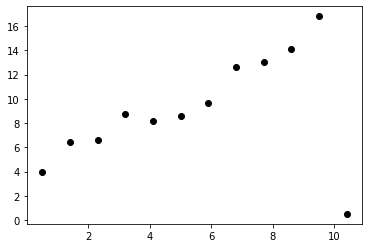

In [35]:
from scipy.io import loadmat

!wget https://github.com/yexf308/MAT592/blob/main/homework/HW1/regression_outlier.mat?raw=true -O regression_outlier.mat
data = loadmat('regression_outlier.mat')
X, Y=data['x_train'], data['y_train']
fig, ax = plt.subplots()
plt.plot(X,Y,'o',color='black')



---



1.   (15pt) Solve the  above optimization problem for the given data set. You may simply use the subroutine _scipy.optimize_. Create a figure to plot the data points $\{ (x^{(i)}, y^{(i)}) \}_{i=1}^n$ and the LAD regression line. Label the axes. Briefly discuss about your findings.









In [36]:
from scipy.optimize import minimize

In [37]:
w=[3,1]
def optimal(param):
  w0,w1=param
  total=0
  for i in range(len(X)):
    total += abs(Y[i]-w0-w1*X[i])
  return total
opt = minimize(optimal,w).x
print(opt)

[3.80892621 1.19942096]


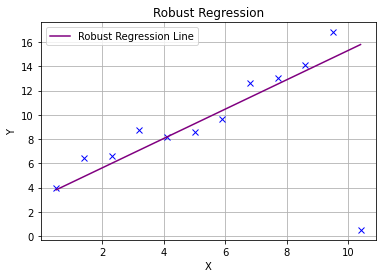

In [38]:
plot(X,Y,'bx')
xlabel('X')
ylabel('Y')
title('Robust Regression')
grid()
x = linspace(0,10,12)
plot(X,opt[1]*x+opt[0], 'purple', label='Robust Regression Line')
legend()

## **Your Answer**:

In observing our robust regression line of our data, it fit our data nicely when not considering the outlier at approximately x=10.5. If the outlier was considered in the regression line, slope of our line would decrease (and a change in intercept) to fit the outlier.



---


2.   (10pt) Solve the corresponding least squares (LS) problem:
\begin{align*}
\min_{w_0,w_1} \; \sum_{i=1}^n (y^{(i)} - w_0 -w_1 x^{(i)})^2
  \end{align*}
  Plot the obtained least square regression line (in different style and color) in the same figure as in part 1. Briefly discuss about your findings.


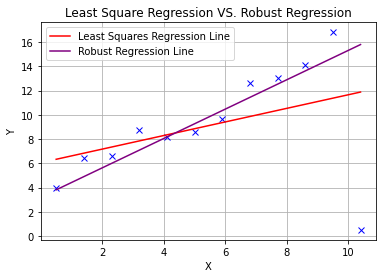

In [39]:
n,m=X.shape
X_ones=np.ones((n,1))
X1=np.column_stack((X_ones,X))

q,r = LA.qr(X1)
w = LA.solve(r, q.T.dot(Y))
Yhat=X1.dot(w)
plot(X,Y,'bx');
plot(X,Yhat,'r', label='Least Squares Regression Line');
plot(X,opt[1]*x+opt[0], 'purple', label='Robust Regression Line')
xlabel('X')
ylabel('Y')
title('Least Square Regression VS. Robust Regression')
grid()
legend()

## **Your Answer**: 

Comparing the robust regression line with the least square regression line, it is clear to see our robust fits our data better than the least square. Simply by looking at the least square regression line and our data points, its clear that the residue is much larger and does not predict well.